# Group 19: Individual Submission

#### Julia Ling, 79560223

This submission contains:

- Full descriptive summaries of the `players.csv` and `sessions.csv` datasets
  - read in and referred to as: `players_data` and `sessions_data`
- Broad and specific questions for the data and how the data will help address them
- Exploratory data analysis
- Visualization
- Methods to address the question with the selected dataset
- Link to GitHub repository for this project
- Extra work, put at the bottom for cleanliness



### Dataset Summary: players_data

The `players_data` dataset contains 196 observations (i.e., 196 players). There are seven different variables. Below are the variables' names, types, and meanings.

- `experience`: character variable, 5 categories ("Pro", "Veteran", "Amateur", "Regular", "Beginner") based on how much experience the player has with Minecraft.
- `subscribe`: logical variable, returns "TRUE" or "FALSE" depending if the player is currently subscribed to a game-related newsletter
- `hashedEmail`: character variable returning the player's email, irreversibly transformed to a unique string (facilitating individualization while retaining privacy).
- `played_hours`: double-class variable corresponding to how many hours the player has spent playing the game.
- `name`: character variable containing the player's name (likely first name).
- `gender`: character variable, 7 categories ("Male", "Female", "Non-binary", "Prefer not to say", "Agender", "Two-Spirited", "Other"), self-reported by the player.
- `Age`: double-class variable returning the player's age in years (self-reported).

Summary statistics can be individually computed with commands like `mean()`, `min()`, or `max()`, but it is efficient to collect them all at once with `summary()`. Summary statistics have been rounded to two decimal places.

| Variable | min | 1st quartile | median | mean | 3rd quartile | max | NA's |
| -------- | --- | ------------ | ------ | ---- | ------------ | --- | ---- |
| `played_hours` (hours) | 0.00 | 0.00 | 0.10 | 5.85 | 0.60 | 223.10 | -- |
| `age` (years) | 9.00 | 17.00 | 19.00 | 21.14 | 22.75 | 58.00 | 2 |

For `age`, NA's means that two players opted not to share their ages.
The third variable in `players_data` with summary statistics is `subscribe`, as such:

| Variable | TRUE | FALSE |
| -------- | ---- | ----- |
| `subscribe` | 144 | 52 |

This just means that 144 players in the dataset are subscribed to a game-related newsletter.

There are no apparent issues in the data. There could be issues that I cannot see, like if values in `hashedEmail` do not correspond to `name`.

The `players_data` data was collected by the Pacific Laboratory for Artificial Intelligence (PLAI) research group in the Department of Computer Science at UBC. PLAI has created PLAICraft (a vanilla survival Minecraft server) to record participant players' gameplay, speech, and key presses to advance AI, hopefully to assist NPC development in "normal" Minecraft.



### Dataset Summary: sessions_data

The `sessions_data` dataset contains 1535 observations. There are five different variables. Below are the variables' names, types, and meanings.

- `hashedEmail`: character variable returning the player's email, irreversibly transformed into a unique string (facilitating individualization while retaining privacy).
- `start_time`: character variable detailing the date and time a player begins a session on PLAICraft.
- `end_time`: character variable detailing the date and time a player ends a session on PLAICraft.
- `original_start_time`: double-class variable, the same as `start_time` but recorded in UNIX time (milliseconds).
- `original_end_time`: double-class variable, the same as `end_time` but recorded in UNIX time (milliseconds).

Similar to the `players_data`, I have collected the summary statistics with `summary()` instead of using multiple smaller commands. The statistics are still rounded to two decimal places.

| Variable | min | 1st quartile | median | mean | 3rd quartile | max | NA's |
| -------- | --- | ------------ | ------ | ---- | ------------ | --- | ---- |
| `original_start_time` | 1.71e+12 | 1.72e+12 | 1.72e+12 | 1.72e+12 | 1.72e+12 | 1.73e+12 | -- |
| `original_end_time` | 1.71e+12 | 1.72e+12 | 1.72e+12 | 1.72e+12 | 1.72e+12| 1.73e+12 | 2 |

There are definitely apparent issues in the data. When rounding `original_start_time` and `original_end_time` to two decimal places, the values are so large that they look identical.

There could also be issues I cannot directly see. It is currently unclear, given the number of observations in the dataset, if multiple sessions are attributed to the same player. It is more likely that the dataset contains multiple sessions from the 196 players recorded in `players_data`, but requires wrangling to fully determine.

This data was also collected by PLAI in the same research study.



### Questions to Address

**Broad:** What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Specific:** Can age and gender predict whether a player will subscribe to a game-related newsletter?

The data will address the question by identifying which age and gender groups are most likely to subscribe, and therefore where most marketing should concentrate. I plan to graph the data from `players_data` and pick the best k for k-nn classification.


### Exploratory Data Analysis

We should first load in some libraries to access their functions. Then we can read in the datasets and make them tidy.




In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
download.file("https://raw.githubusercontent.com/ylljulia/dsci-100-group-19-jling/refs/heads/main/players.csv",
              "players.csv")
download.file("https://raw.githubusercontent.com/ylljulia/dsci-100-group-19-jling/refs/heads/main/sessions.csv",
              "sessions.csv")

players_data <- read_csv("players.csv")
sessions_data <- read_csv("sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


***Is it tidy?***

`players_data`: Yes!
- Each variable has its own column
- Each observation has its own row
- Each value has its own cell

`sessions_data`: No :(
- `start_time` and `end_time` contain both date and time in one cell

***Let's fix it!***


In [3]:
sessions_wrangled <- sessions_data |>
    separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
    mutate(start_date = as.Date(start_date)) |>
    separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
    mutate(end_date = as.Date(end_date))

sessions_wrangled


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30-06-20,18:12,30-06-20,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17-06-20,23:33,17-06-20,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25-07-20,17:34,25-07-20,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28-07-20,15:36,28-07-20,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25-07-20,06:15,25-07-20,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20-05-20,02:26,20-05-20,02:45,1.71617e+12,1.71617e+12


***We also need to compute the mean value for each quantitative variable in the `players_data` dataset-- so, `played_hours` and `Age`.***


In [4]:
players_mean_hours <- mean(players_data$played_hours)
players_mean_age <- mean(players_data$Age, na.rm = TRUE)

players_mean_hours
players_mean_age


[1] 5.845918

[1] 21.13918

***We can show the computed mean values (to two decimal points) in a table.***

| Variable | mean | mean units |
| -------- | ---- | ---------- |
| `played_hours` | 5.85 | hours|
| `Age` | 21.14 | years |


### Visualization

Now that we've tidied the data, we can create some starting-point plots.


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


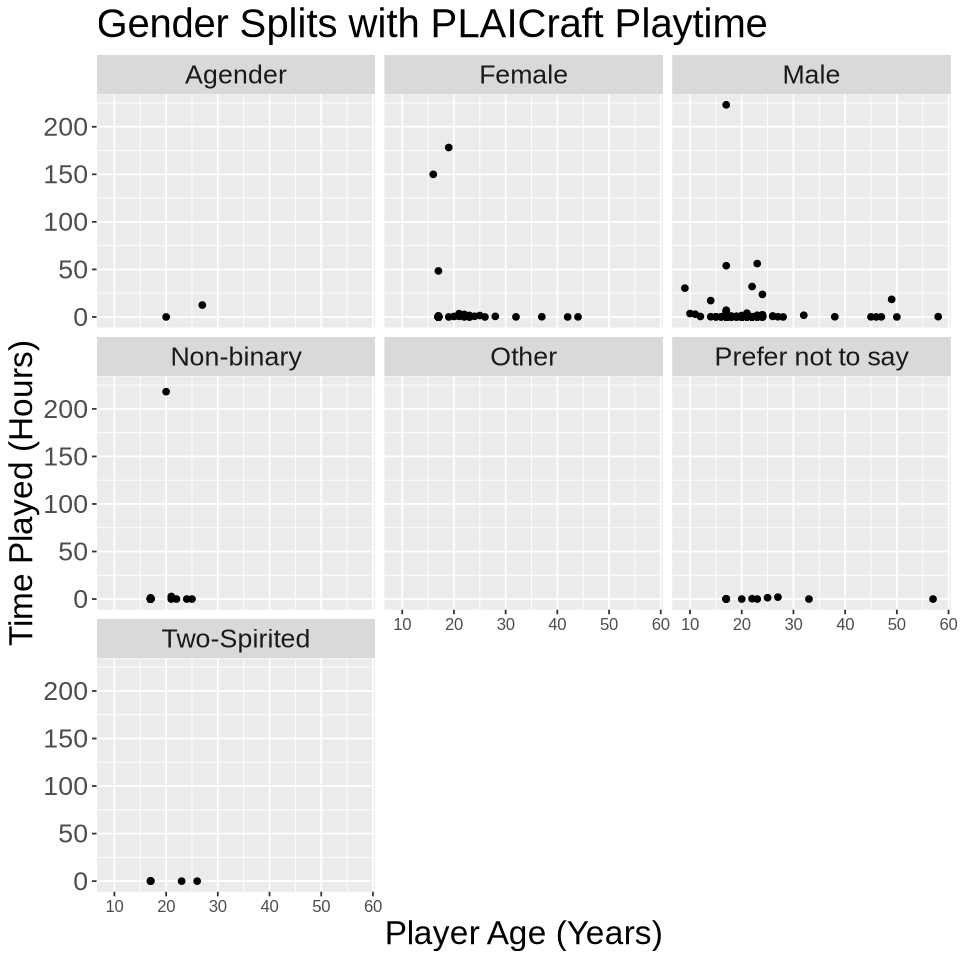

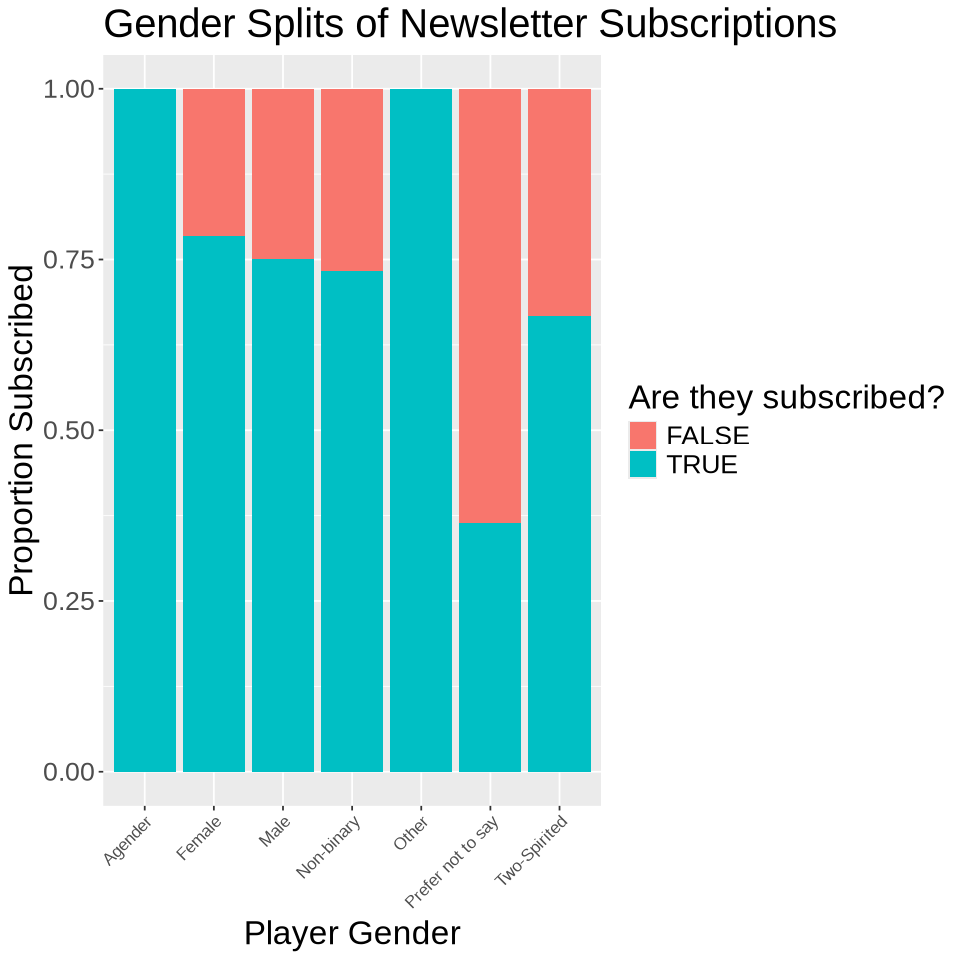

In [5]:
options(repr.plot.width = 8, repr.plot.height = 8)

players_genderageplot <- players_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    facet_wrap(~ gender) +
    labs(x = "Player Age (Years)", y = "Time Played (Hours)") +
    ggtitle("Gender Splits with PLAICraft Playtime") +
    theme(text = element_text(size = 20),
          axis.text.x = element_text(size = 10))

players_genderageplot

players_subscribeplot <- players_data |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    #facet_grid(gender ~ experience) +
    labs(x = "Player Gender", y = "Proportion Subscribed",
         fill = "Are they subscribed?",
         title = "Gender Splits of Newsletter Subscriptions") +
    theme(text = element_text(size = 20),
          axis.text.x = element_text(size = 10, angle = 45, hjust = 1))

players_subscribeplot


***Visualization Insights***

`players_genderageplot` shows correlations between player age and time played, with most players around 15-25 years old across genders.

`players_subscribeplot` shows correlations between players gender and subscription status.

These plots are very useful for answering if age and gender can predict subscription. They show strong trends for gender, and provide a starting point for future age analysis.


### Methods and Plan for the Project

I propose using k-nn classification to answer the question as it is simple to implement and good for small datasets. Potential limits include oversampling (i.e. if one gender is overrepresented in the data). 

Data processing will include standardization, splitting (into training and testing sets before analysis), and cross-validation. Splitting the data 70-30 and cross-validating will be useful as this dataset is small and harder to fine-tune without compromising final test integrity.



### GitHub Repository Link

https://github.com/ylljulia/dsci-100-group-19-jling.git


### Showing my Work (Summary Statistics)


In [6]:
#players summary statistics work

players_summary = players_data |>
    summary()
players_summary

experience_types = unique(players_data$experience) #$ access unique values from experience in players_data
experience_types

gender_types = unique(players_data$gender)
gender_types



  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

In [7]:
#sessions summary statistics work

sessions_summary = sessions_data |>
    summary()
sessions_summary


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          